In [1]:
from multi_imbalance.datasets import load_datasets
import experiment_safeness as ex
from sklearn.model_selection import StratifiedKFold
from collections import Counter, defaultdict
from multi_imbalance.utils.metrics import gmean_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from utils import plot_embeddings
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
datasets = load_datasets()

In [3]:
ds_name = 'hayes-roth'
test_on_all_folds = False
test_all_ds = False

In [4]:
datasets = ex.one_hot_encode_all(datasets)

In [5]:
config = ex.config_calculation_strategy2(datasets)

In [6]:
config['cmc'] = {'nn_config': {'units_1st_layer': 17,
                               'units_2nd_layer': 256,
                               'units_3rd_layer': 128,
                               'units_latent_layer': 8},
                 'weighted_triplet_loss': True,
                 'lr': 0.0002,
                 'batch_size': 16,
                 'gamma': 0.99,
                 'epochs': 55}


config['dermatology'] = {'nn_config': {'units_1st_layer': 97,
                                       'units_2nd_layer': 512,
                                       'units_3rd_layer': 256,
                                       'units_latent_layer': 16},
                         'weighted_triplet_loss': True,
                         'lr': 0.0010,
                         'batch_size': 16,
                         'gamma': 0.99,
                         'epochs': 45}

config['hayes-roth'] = {'nn_config': {'units_1st_layer': 11,
                                      'units_2nd_layer': 128,
                                      'units_3rd_layer': 64,
                                      'units_latent_layer': 16},
                        'weighted_triplet_loss': True,
                        'lr': 0.0015,
                        'batch_size': 1,
                        'gamma': 0.99,
                        'epochs': 1}

config['new_vehicle'] = {'nn_config': {'units_1st_layer': 18,
                                       'units_2nd_layer': 256,
                                       'units_3rd_layer': 128,
                                       'units_latent_layer': 16},
                         'weighted_triplet_loss': True,
                         'lr': 0.001,
                         'batch_size': 16,
                         'gamma': 0.99,
                         'epochs': 150}

config['new_yeast'] = {'nn_config': {'units_1st_layer': 9,
                                     'units_2nd_layer': 300,
                                     'units_3rd_layer': 200,
                                     'units_latent_layer': 12},
                       'weighted_triplet_loss': True,
                       'lr': 0.0004,
                       'batch_size': 32,
                       'gamma': 0.99,
                       'epochs': 60}

config['balance-scale'] = {'nn_config': {'units_1st_layer': 16,
                                         'units_2nd_layer': 256,
                                         'units_3rd_layer': 128,
                                         'units_latent_layer': 10},
                           'weighted_triplet_loss': True,
                           'lr': 0.007,
                           'batch_size': 16,
                           'gamma': 0.99,
                           'epochs': 100}

config['cleveland'] = {'nn_config': {'units_1st_layer': 24,
                                     'units_2nd_layer': 72,
                                     'units_3rd_layer': 48,
                                     'units_latent_layer': 16},
                       'weighted_triplet_loss': True,
                       'lr': 0.00002,
                       'batch_size': 16,
                       'gamma': 0.99,
                       'epochs': 120}

config['cleveland_v2'] = {'nn_config': {'units_1st_layer': 23,
                                        'units_2nd_layer': 256,
                                        'units_3rd_layer': 128,
                                        'units_latent_layer': 16},
                          'weighted_triplet_loss': True,
                          'lr': 0.00002,
                          'batch_size': 16,
                          'gamma': 0.99,
                          'epochs': 100}

config['glass'] = {'nn_config': {'units_1st_layer': 9,
                                 'units_2nd_layer': 256,
                                 'units_3rd_layer': 128,
                                 'units_latent_layer': 12},
                   'weighted_triplet_loss': True,
                   'lr': 0.001,
                   'batch_size': 16,
                   'gamma': 0.99,
                   'epochs': 120}

config['thyroid-newthyroid'] = {'nn_config': {'units_1st_layer': 5,
                                              'units_2nd_layer': 64,
                                              'units_3rd_layer': 32,
                                              'units_latent_layer': 8},
                                'weighted_triplet_loss': True,
                                'lr': 0.001,
                                'batch_size': 16,
                                'gamma': 0.99,
                                'epochs': 120}

config['new_ecoli'] = {'nn_config': {'units_1st_layer': 7,
                                     'units_2nd_layer': 128,
                                     'units_3rd_layer': 64,
                                     'units_latent_layer': 12},
                       'weighted_triplet_loss': True,
                       'lr': 0.0001,
                       'batch_size': 16,
                       'gamma': 0.99,
                       'epochs': 100}

config['new_led7digit'] = {'nn_config': {'units_1st_layer': 7,
                                         'units_2nd_layer': 64,
                                         'units_3rd_layer': 32,
                                         'units_latent_layer': 8},
                           'weighted_triplet_loss': True,
                           'lr': 0.001,
                           'batch_size': 16,
                           'gamma': 0.99,
                           'epochs': 100}

config['new_winequality-red'] = {'nn_config': {'units_1st_layer': 11,
                                               'units_2nd_layer': 128,
                                               'units_3rd_layer': 64,
                                               'units_latent_layer': 12},
                                 'weighted_triplet_loss': True,
                                 'lr': 0.003,
                                 'batch_size': 16,
                                 'gamma': 0.99,
                                 'epochs': 100}

config['4delikatne-bezover-cut'] = {'nn_config': {'units_1st_layer': 2,
                                                  'units_2nd_layer': 128,
                                                  'units_3rd_layer': 64,
                                                  'units_latent_layer': 8},
                                    'weighted_triplet_loss': True,
                                    'lr': 0.004,
                                    'batch_size': 16,
                                    'gamma': 0.99,
                                    'epochs': 120}

config['3mocniej-cut'] = {'nn_config': {'units_1st_layer': 2,
                                        'units_2nd_layer': 128,
                                        'units_3rd_layer': 64,
                                        'units_latent_layer': 10},
                          'weighted_triplet_loss': True,
                          'lr': 0.04,
                          'batch_size': 16,
                          'gamma': 0.99,
                          'epochs': 90}


config['1czysty-cut'] = {'nn_config': {'units_1st_layer': 2,
                                       'units_2nd_layer': 64,
                                       'units_3rd_layer': 32,
                                       'units_latent_layer': 8},
                         'weighted_triplet_loss': True,
                         'lr': 0.004,
                         'batch_size': 16,
                         'gamma': 0.99,
                         'epochs': 130}

config['2delikatne-cut'] = {'nn_config': {'units_1st_layer': 2,
                                          'units_2nd_layer': 128,
                                          'units_3rd_layer': 64,
                                          'units_latent_layer': 12},
                            'weighted_triplet_loss': True,
                            'lr': 0.04,
                            'batch_size': 16,
                            'gamma': 0.99,
                            'epochs': 90}

In [7]:
config

{'1czysty-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 64,
   'units_3rd_layer': 32,
   'units_latent_layer': 8},
  'weighted_triplet_loss': True,
  'lr': 0.004,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 130},
 '2delikatne-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 128,
   'units_3rd_layer': 64,
   'units_latent_layer': 12},
  'weighted_triplet_loss': True,
  'lr': 0.04,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 90},
 '3mocniej-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 128,
   'units_3rd_layer': 64,
   'units_latent_layer': 10},
  'weighted_triplet_loss': True,
  'lr': 0.04,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 90},
 '4delikatne-bezover-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 128,
   'units_3rd_layer': 64,
   'units_latent_layer': 8},
  'weighted_triplet_loss': True,
  'lr': 0.004,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 120},
 'balance-scale': {'nn_config': {'un

In [8]:
def instantiate_classifiers():
    classifiers = {
            "RF24": RandomForestClassifier(random_state=0, min_samples_leaf=2, min_samples_split=4, class_weight='balanced'),
            "DT": DecisionTreeClassifier(random_state=0, min_samples_split=4, min_samples_leaf=2, class_weight='balanced'),
            "KNN": KNeighborsClassifier(n_neighbors=1),
            "QDA": QuadraticDiscriminantAnalysis(),
            "LDA": LinearDiscriminantAnalysis()
        } 
    return classifiers

In [9]:
from experiment import dt_name_to_cols_to_encode


In [10]:
from sklearn.neighbors import KNeighborsClassifier

def calc_safety5(X,y):
    result = {
        "safe":0,
        "borderline":0,
        "rare":0,
        "outlier":0
    }
    neigh = KNeighborsClassifier(n_neighbors=5)
    neigh.fit(X, y)
    neighbors = neigh.kneighbors(X, 5+1, False)
    for i, (x, nbors) in enumerate(list(zip(X, neighbors))):
#         print(x)
#         print(y[i])
#         print(nbors[1:])
#         print(y[nbors[1:]])
        same_class_nbrs = (y[nbors[1:]] == y[i]).sum()
        if same_class_nbrs >= 4:
            result['safe'] += 1
        elif same_class_nbrs >= 2:
            result['borderline'] += 1
        elif same_class_nbrs == 1:
            result['rare'] += 1
        else:
            result['outlier'] += 1
    return result

In [11]:
def standardize(X_train, X_test):
    means = X_train.mean(axis=0)
    stds = X_train.std(axis=0)
    return (X_train - means) / (stds+1e-6), (X_test - means) / (stds + 1e-6)

hayes-roth


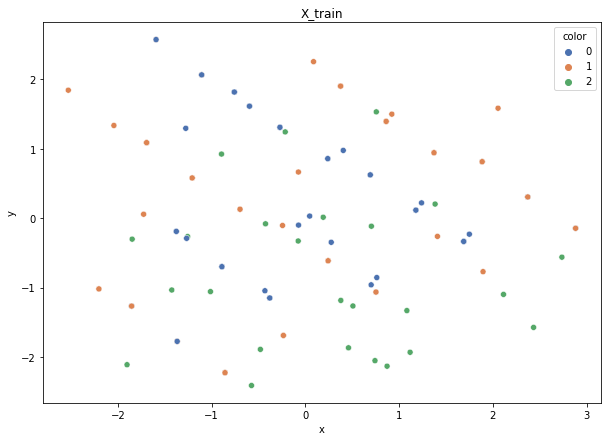

Class cardinalities: Counter({0: 52, 1: 51, 2: 25})
Weights: {0: 0.243925770040176, 1: 0.24870862827625786, 2: 0.507365601683566}
(6, 11)


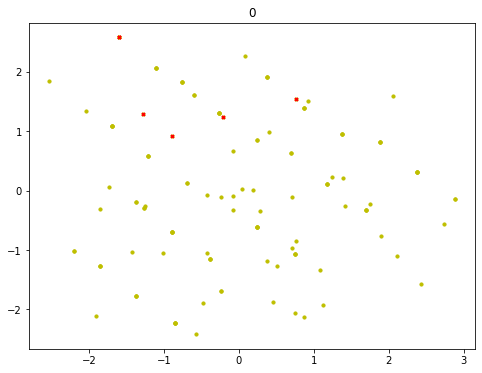

Distances same class: tensor([0.3219, 0.1875], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.5093278884887695
(6, 11)


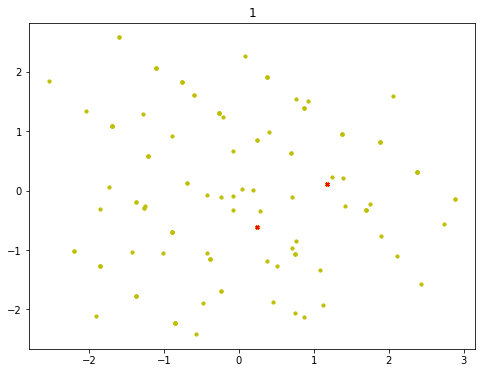

Distances same class: tensor([0., 0.], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0
(6, 11)


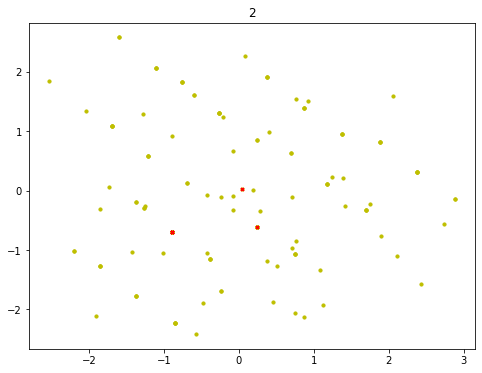

Distances same class: tensor([0.0000, 0.0000, 0.0000, 0.0473], device='cuda:0',
       grad_fn=<StackBackward>)
Same class distances sum: 0.04731132835149765
(6, 11)


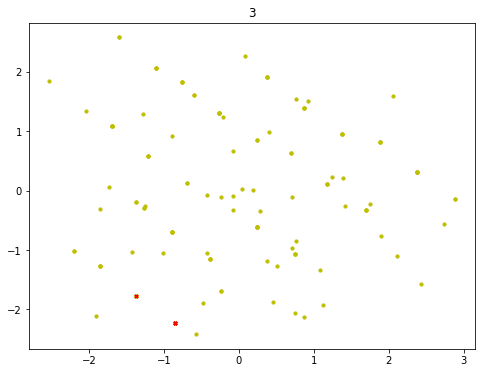

Distances same class: tensor([0.], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0
(6, 11)


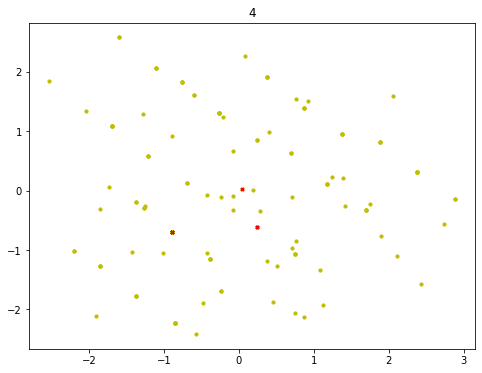

Distances same class: tensor([0.0000, 0.0000, 0.0000, 0.0192], device='cuda:0',
       grad_fn=<StackBackward>)
Same class distances sum: 0.019154541194438934
(6, 11)


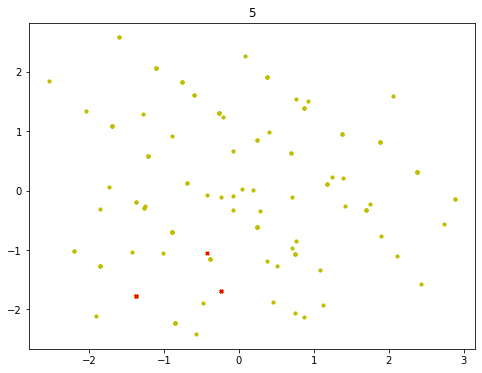

Distances same class: tensor([0.0000, 0.0440, 0.0440], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0879167914390564
(6, 11)


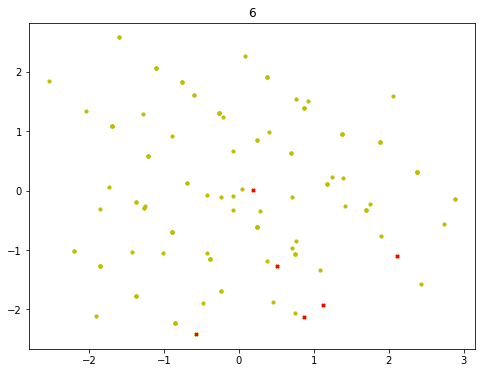

Distances same class: tensor([0.2019, 0.1475, 0.2463, 0.2755, 0.3544], device='cuda:0',
       grad_fn=<StackBackward>)
Same class distances sum: 1.2256155014038086
(6, 11)


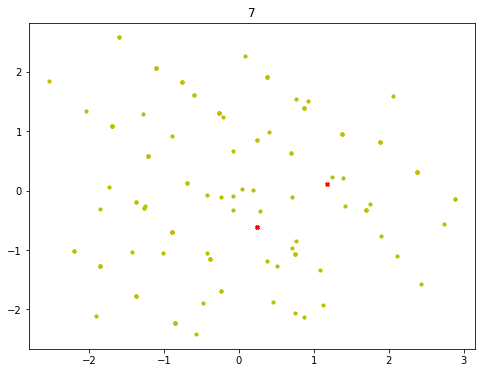

Distances same class: tensor([0., 0., 0.], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0
(6, 11)


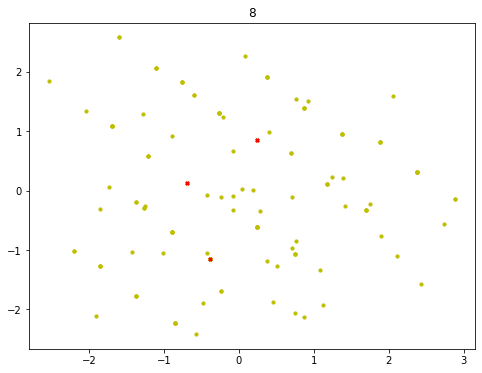

Distances same class: tensor([0.], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0
(6, 11)


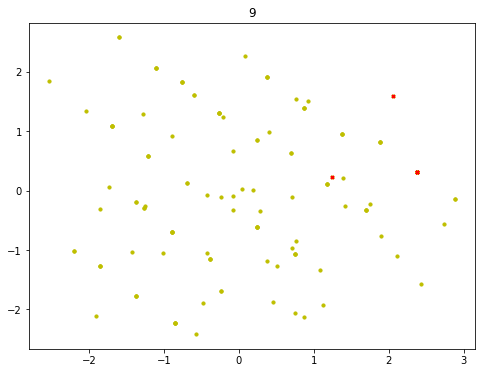

Distances same class: tensor([0.0000, 0.0299], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.029852639883756638
(6, 11)


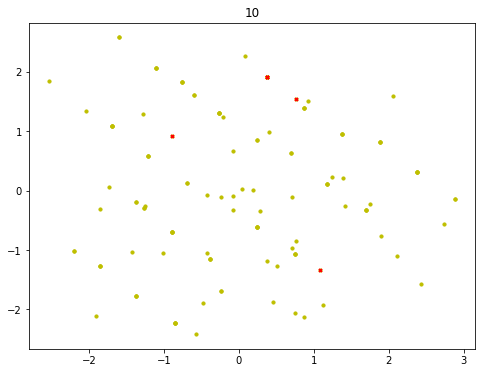

Distances same class: tensor([0.1189, 0.1151], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.2340572029352188
(6, 11)


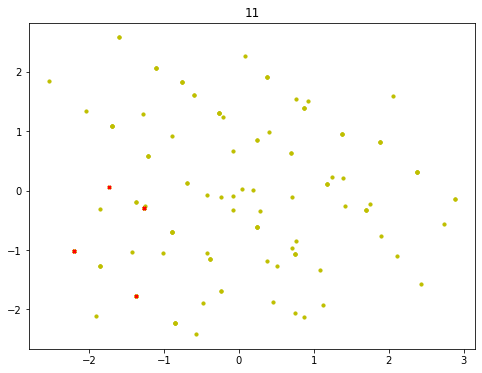

Distances same class: tensor([0.0000, 0.0653, 0.0992], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.1644328534603119
(6, 11)


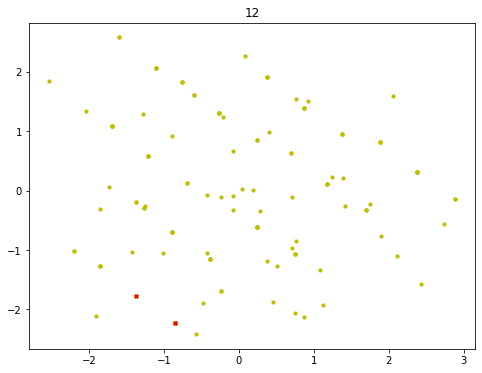

Distances same class: tensor([0.0000, 0.0419, 0.0419], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.08388261497020721
(6, 11)


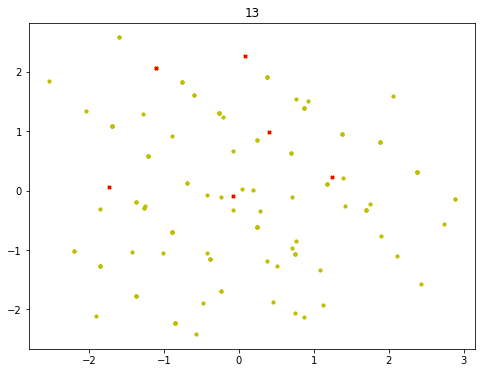

Distances same class: tensor([0.1101, 0.0693, 0.1780], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.3574703335762024
(6, 11)


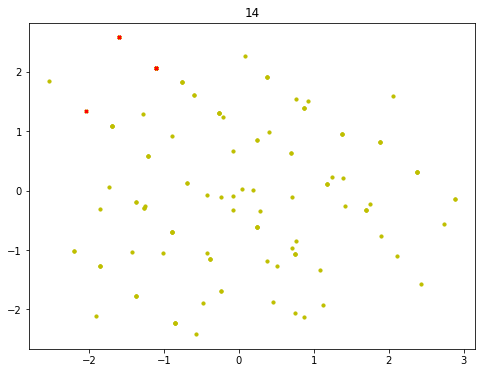

Distances same class: tensor([0.0415, 0.0291], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.07056321203708649
(6, 11)


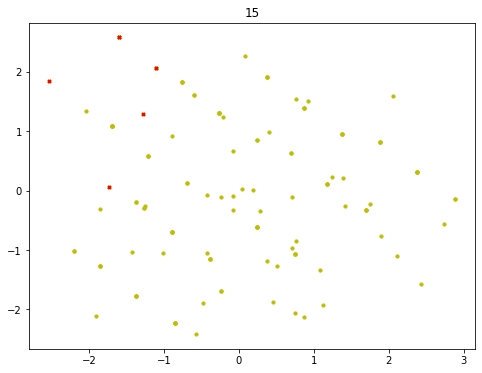

Distances same class: tensor([0.0104, 0.0327], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.04304871708154678
(6, 11)


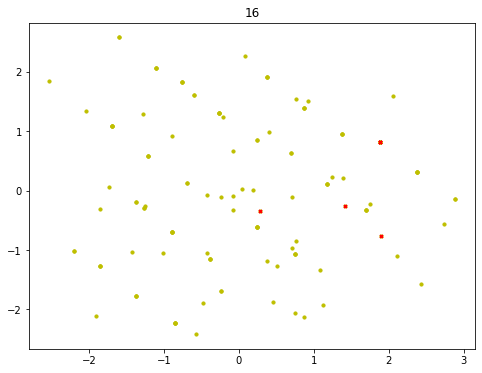

Distances same class: tensor([0.0889, 0.0437, 0.0437], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.17631207406520844
(6, 11)


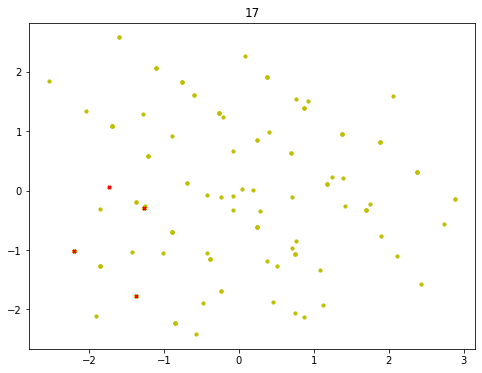

Distances same class: tensor([0.0000, 0.0232, 0.0373], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.060447923839092255
(6, 11)


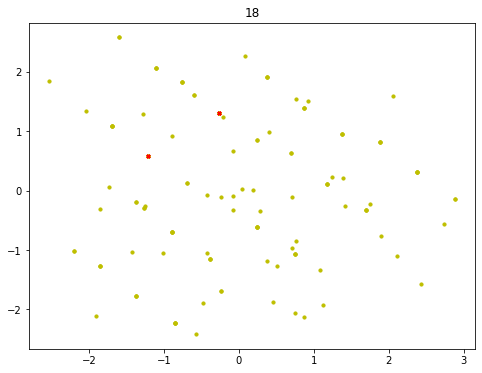

Distances same class: tensor([0., 0.], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0
(6, 11)


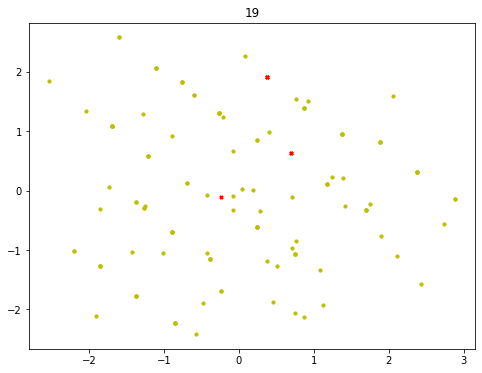

Distances same class: tensor([0.], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0
(6, 11)


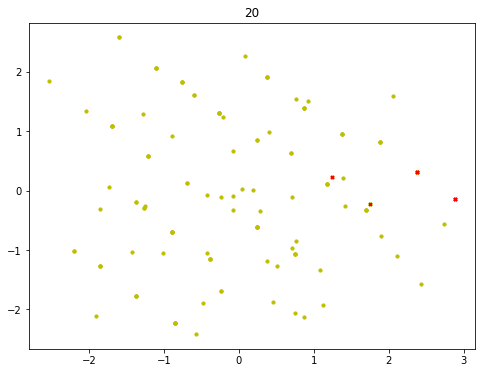

Distances same class: tensor([0.0155, 0.0427, 0.0575], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.11564664542675018
(6, 11)


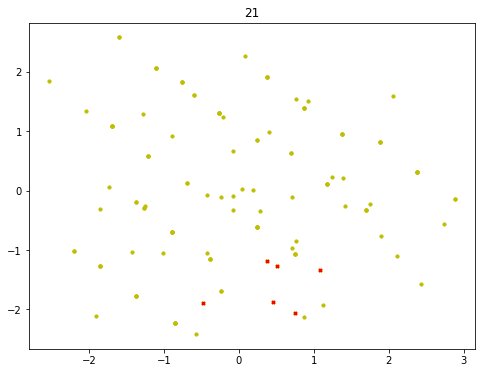

Distances same class: tensor([0.1147, 0.1076, 0.2202, 0.1262, 0.2284], device='cuda:0',
       grad_fn=<StackBackward>)
Same class distances sum: 0.7970706224441528
(6, 11)


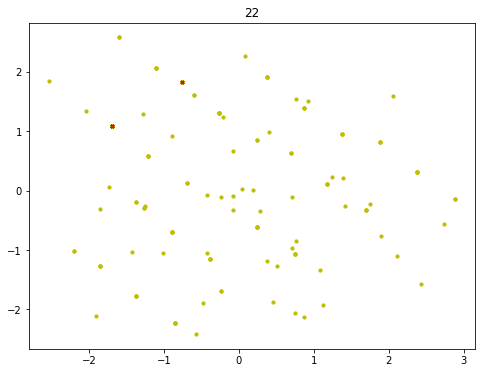

Distances same class: tensor([0., 0., 0.], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0
(6, 11)


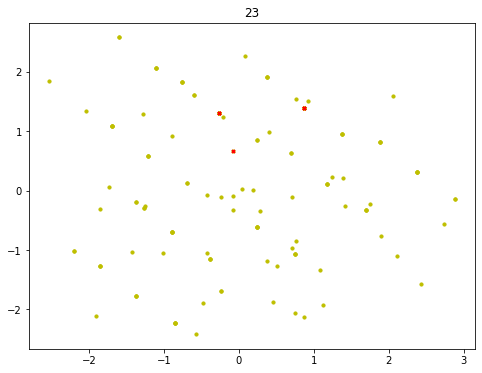

Distances same class: tensor([0.0000, 0.0000, 0.0443], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0442691445350647
(6, 11)


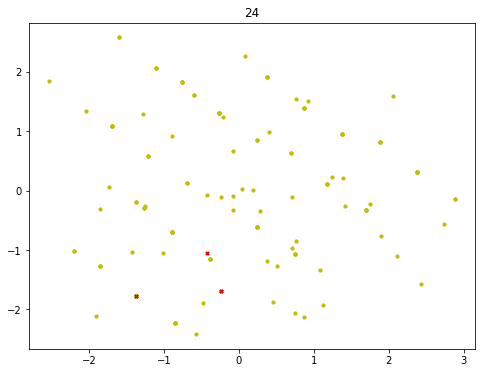

Distances same class: tensor([0.0000, 0.0159, 0.0159], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.03188773989677429
(6, 11)


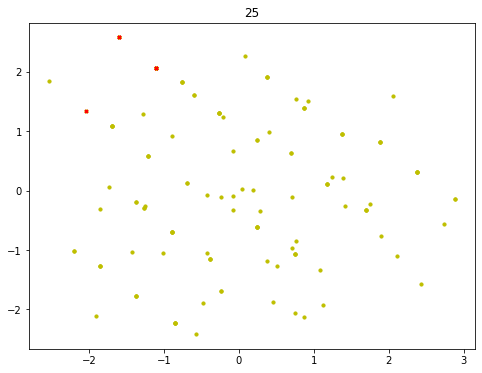

Distances same class: tensor([0.0000, 0.0066], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.006621188949793577
(6, 11)


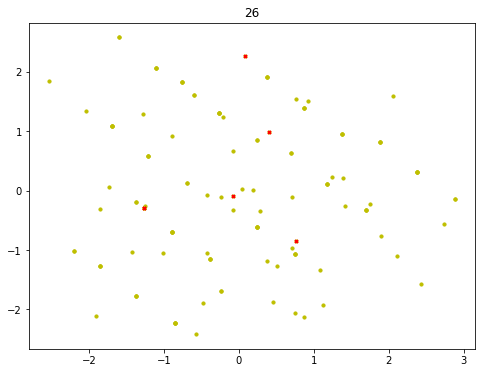

Distances same class: tensor([0.0184, 0.0184, 0.0184, 0.0161], device='cuda:0',
       grad_fn=<StackBackward>)
Same class distances sum: 0.0713459700345993
(6, 11)


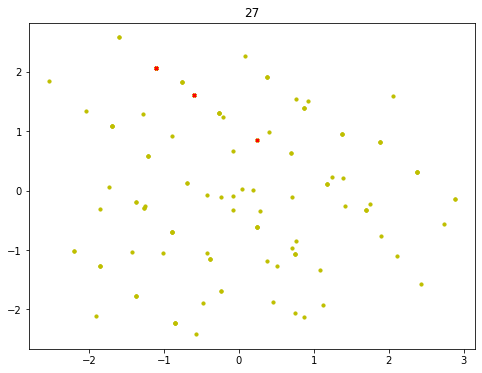

Distances same class: tensor([0.0000, 0.0427, 0.0427, 0.0214], device='cuda:0',
       grad_fn=<StackBackward>)
Same class distances sum: 0.10681258141994476
(6, 11)


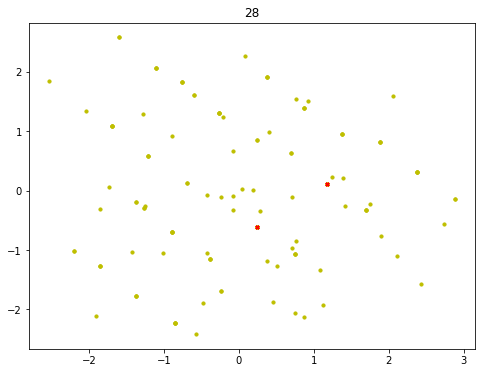

Distances same class: tensor([0., 0.], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0
(6, 11)


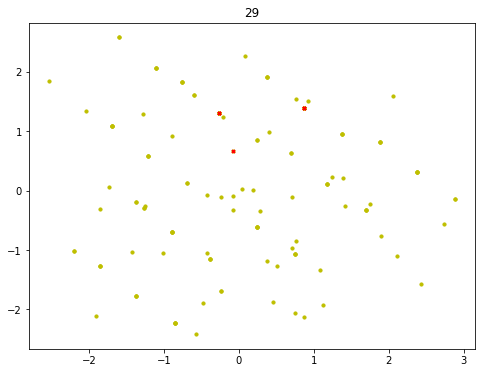

Distances same class: tensor([0.0000, 0.0000, 0.0274], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.027424803003668785
(6, 11)


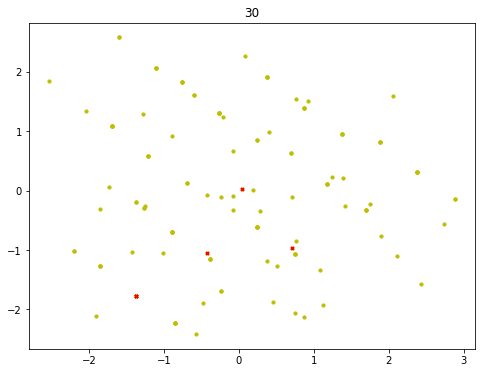

Distances same class: tensor([0.0186, 0.0147, 0.0130], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.04622725397348404
(6, 11)


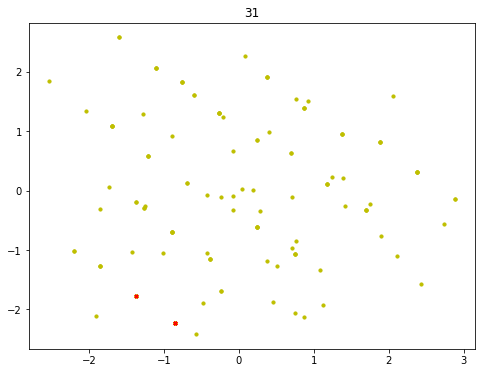

Distances same class: tensor([0.0000, 0.0103, 0.0103], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.020520584657788277
(6, 11)


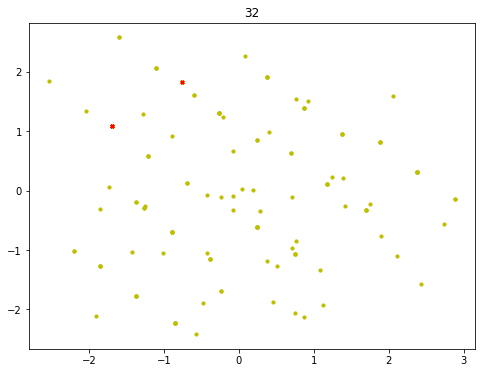

Distances same class: tensor([0., 0., 0.], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0
(6, 11)


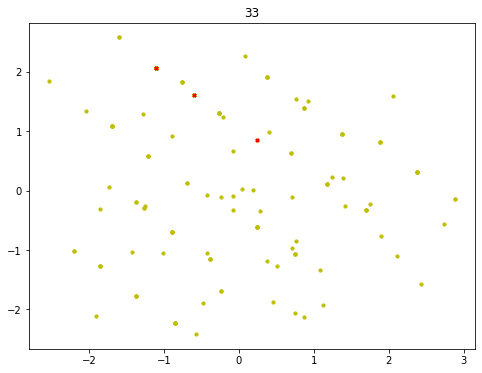

Distances same class: tensor([0.0000, 0.0135, 0.0135, 0.0135], device='cuda:0',
       grad_fn=<StackBackward>)
Same class distances sum: 0.04058041423559189
(6, 11)


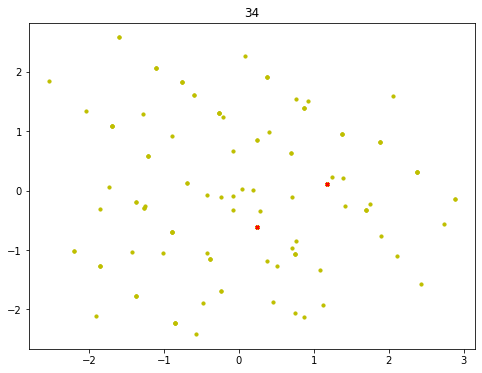

Distances same class: tensor([0., 0.], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0
(6, 11)


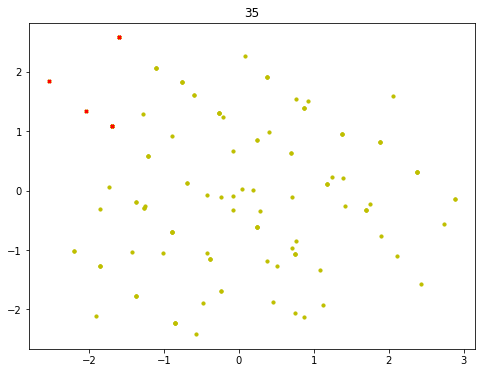

Distances same class: tensor([0.0082, 0.0082, 0.0183, 0.0183], device='cuda:0',
       grad_fn=<StackBackward>)
Same class distances sum: 0.05293690040707588
(6, 11)


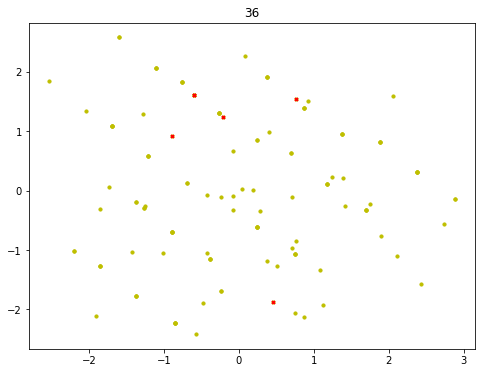

Distances same class: tensor([0.0540, 0.0161, 0.0896], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.15975090861320496
(6, 11)


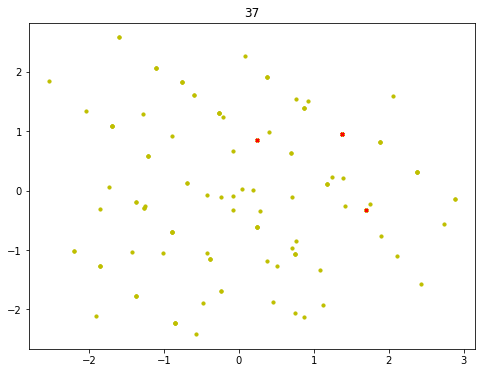

Distances same class: tensor([0., 0.], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0
(6, 11)


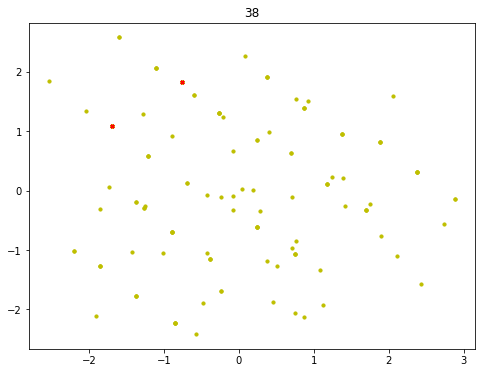

Distances same class: tensor([0., 0.], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0
(6, 11)


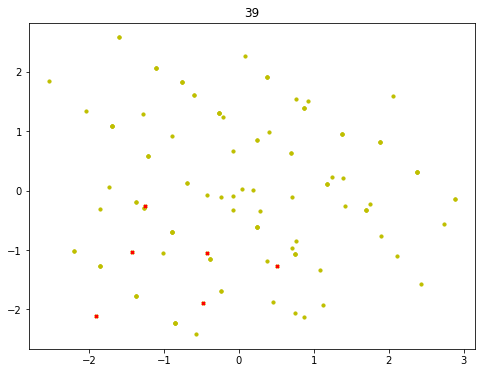

Distances same class: tensor([0.0213, 0.0191, 0.0525, 0.0315], device='cuda:0',
       grad_fn=<StackBackward>)
Same class distances sum: 0.12438664585351944
(6, 11)


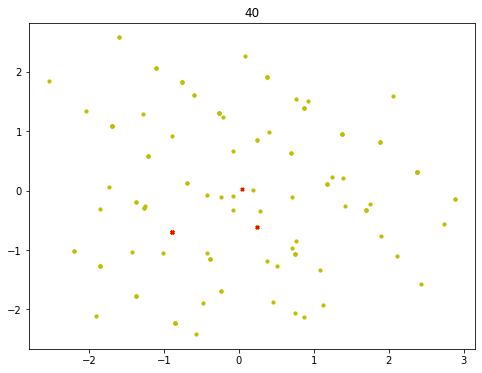

Distances same class: tensor([0.0000, 0.0000, 0.0000, 0.0089], device='cuda:0',
       grad_fn=<StackBackward>)
Same class distances sum: 0.008908340707421303
(6, 11)


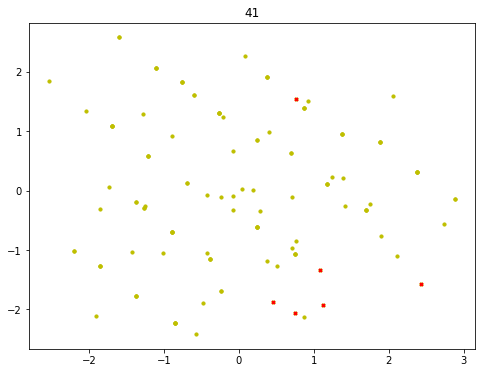

Distances same class: tensor([0.1288, 0.1112, 0.0340, 0.0406, 0.0338], device='cuda:0',
       grad_fn=<StackBackward>)
Same class distances sum: 0.348431259393692
(6, 11)


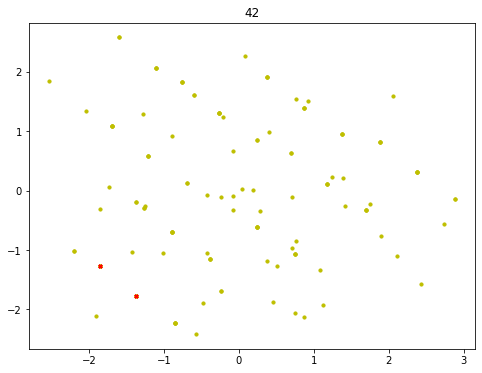

Distances same class: tensor([0.0054, 0.0054], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.010879948735237122
(6, 11)


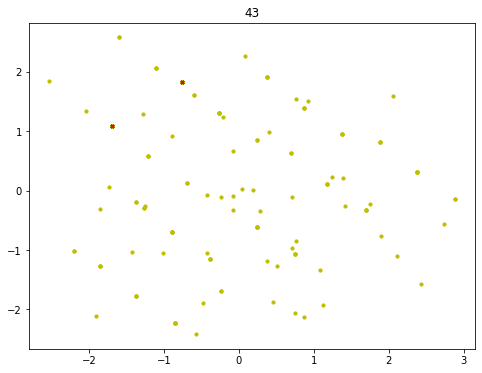

Distances same class: tensor([0., 0.], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0
(6, 11)


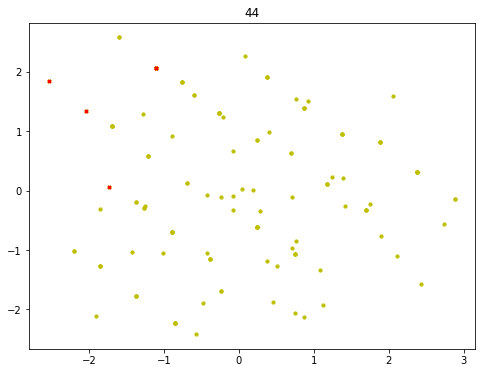

Distances same class: tensor([0.0052, 0.0089, 0.0094], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.02348775789141655
(6, 11)


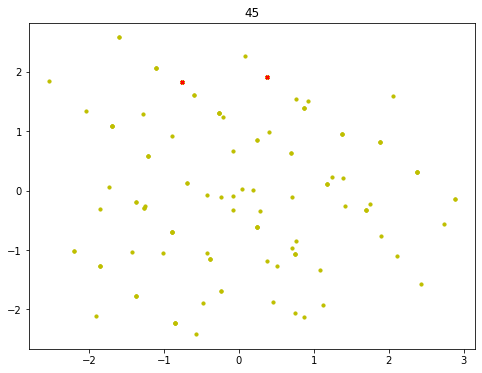

Distances same class: tensor([0., 0.], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0
(6, 11)


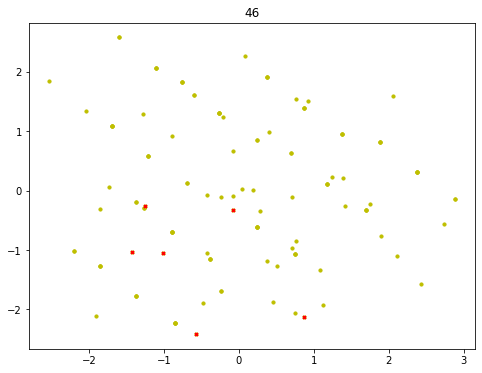

Distances same class: tensor([0.0231, 0.0276, 0.0508, 0.0230, 0.0444], device='cuda:0',
       grad_fn=<StackBackward>)
Same class distances sum: 0.16882534325122833
(6, 11)


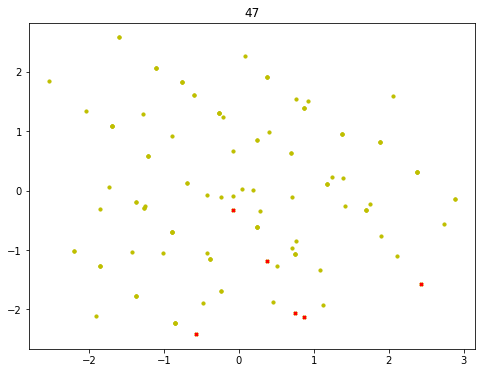

Distances same class: tensor([0.0179, 0.0693, 0.0340, 0.1128, 0.1011], device='cuda:0',
       grad_fn=<StackBackward>)
Same class distances sum: 0.3351482152938843
(6, 11)


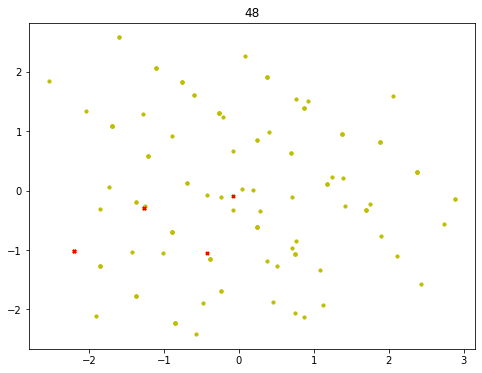

Distances same class: tensor([0.0000, 0.0114, 0.0115], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.022881798446178436
(6, 11)


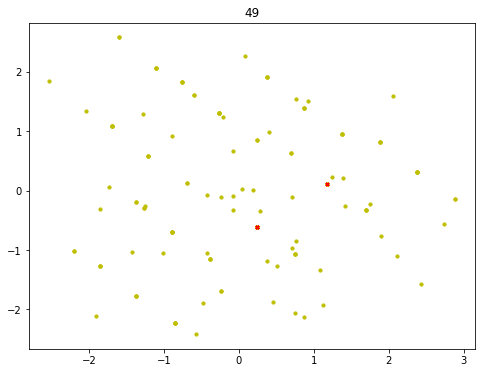

Distances same class: tensor([0., 0., 0.], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0
(6, 11)


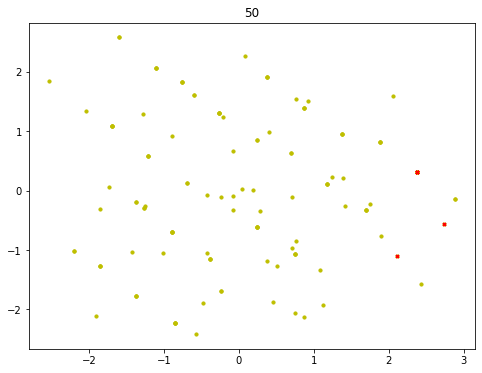

Distances same class: tensor([0.0326], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.03262436389923096
(6, 11)


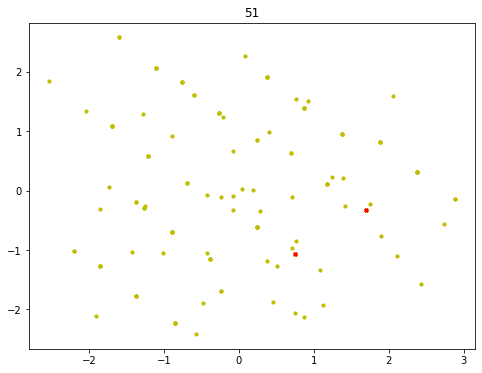

Distances same class: tensor([0., 0.], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0
(6, 11)


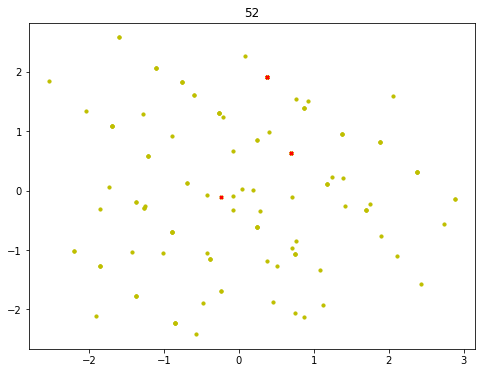

Distances same class: tensor([0.], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0
(6, 11)


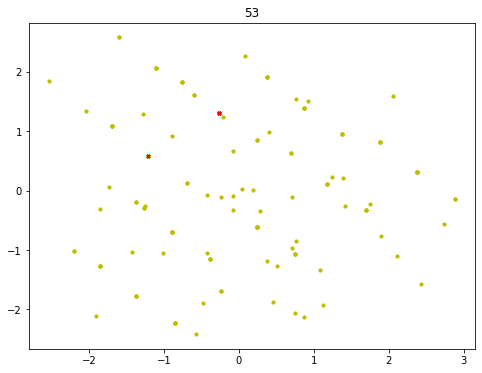

Distances same class: tensor([0., 0., 0.], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0
(6, 11)


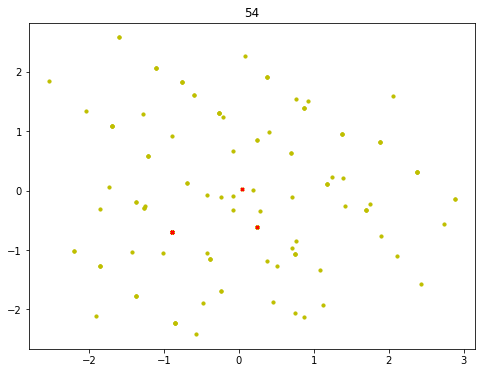

Distances same class: tensor([0.0000, 0.0000, 0.0000, 0.0061], device='cuda:0',
       grad_fn=<StackBackward>)
Same class distances sum: 0.006118102930486202
(6, 11)


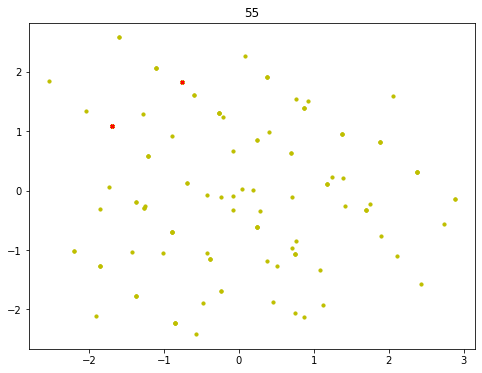

Distances same class: tensor([0., 0., 0.], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0
(6, 11)


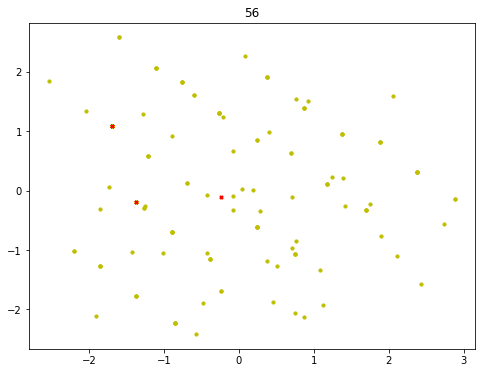

Distances same class: tensor([0.], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0
(6, 11)


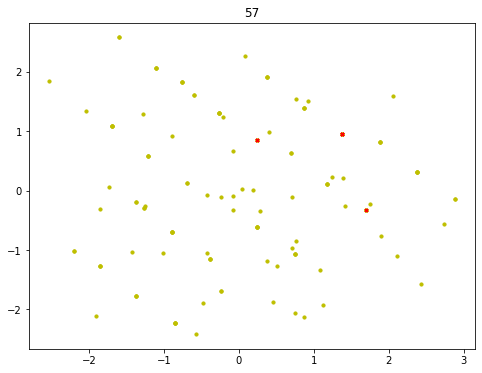

Distances same class: tensor([0., 0.], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0
(6, 11)


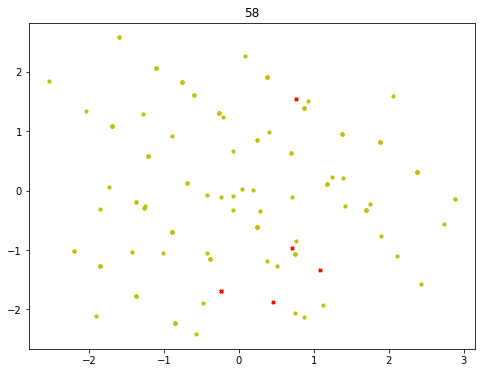

Distances same class: tensor([0.0095, 0.0105], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.019964950159192085
(6, 11)


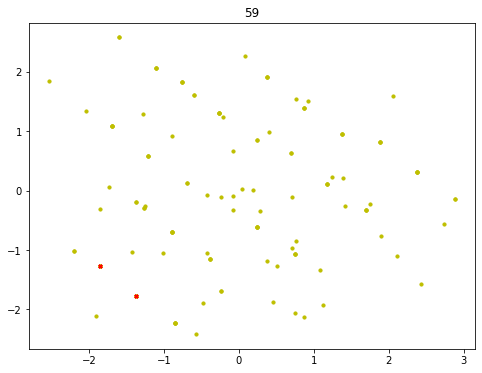

Distances same class: tensor([0.0000, 0.0038], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.003840391058474779
(6, 11)


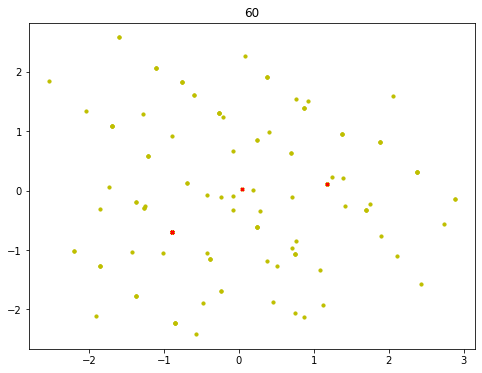

Distances same class: tensor([0.0046, 0.0046, 0.0046, 0.0046, 0.0156], device='cuda:0',
       grad_fn=<StackBackward>)
Same class distances sum: 0.03389563038945198
(6, 11)


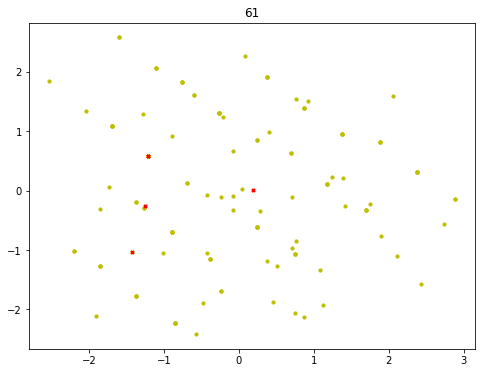

Distances same class: tensor([0.0175, 0.0098], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.02729707956314087
(6, 11)


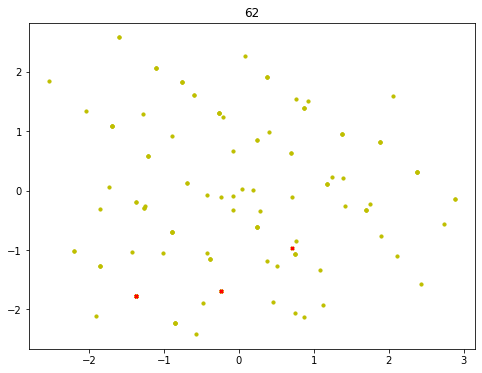

Distances same class: tensor([0.0000, 0.0057, 0.0057], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.011395277455449104
(6, 11)


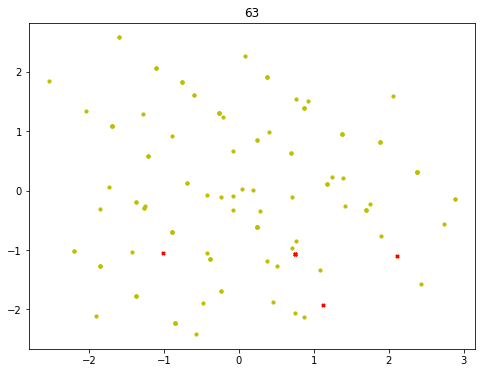

Distances same class: tensor([0.0213, 0.0274], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.048685260117053986
(6, 11)


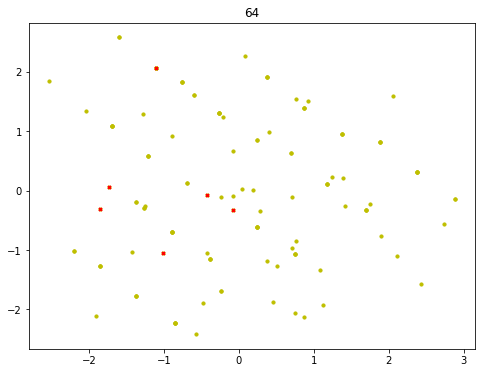

Distances same class: tensor([0.0294, 0.0274, 0.0341], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.09090081602334976
(6, 11)


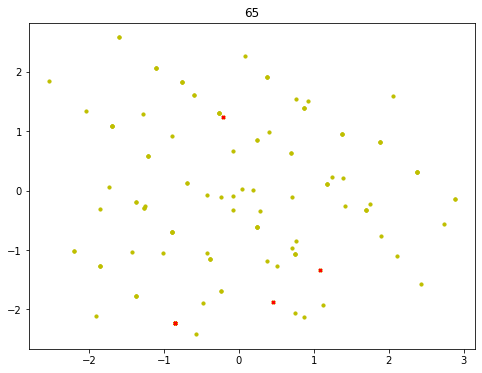

Distances same class: tensor([0.0069, 0.0082], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.015058696269989014
(6, 11)


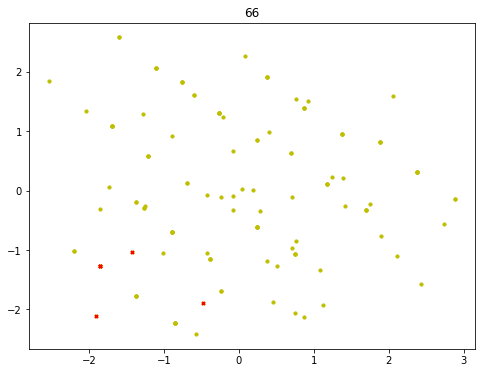

Distances same class: tensor([0.0073, 0.0111], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.01834188401699066
(6, 11)


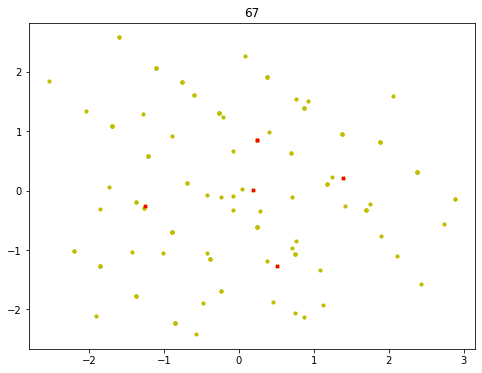

Distances same class: tensor([0.0081, 0.0153, 0.0126], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.03600028529763222
(6, 11)


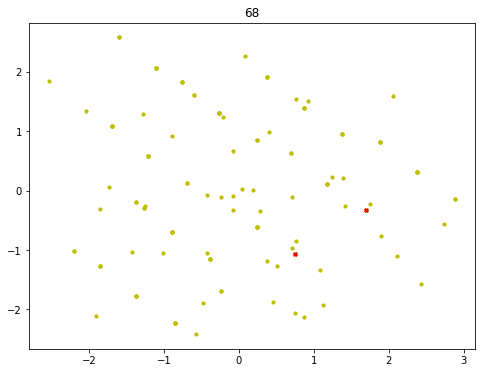

Distances same class: tensor([0., 0.], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0
(6, 11)


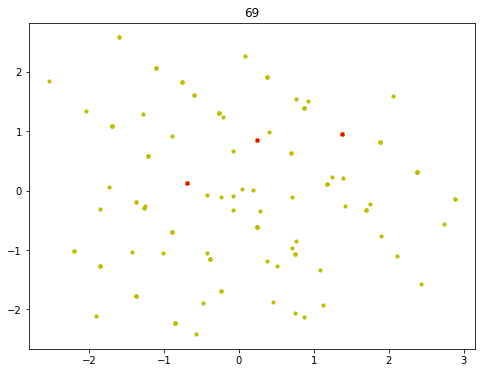

Distances same class: tensor([0.], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0
(6, 11)


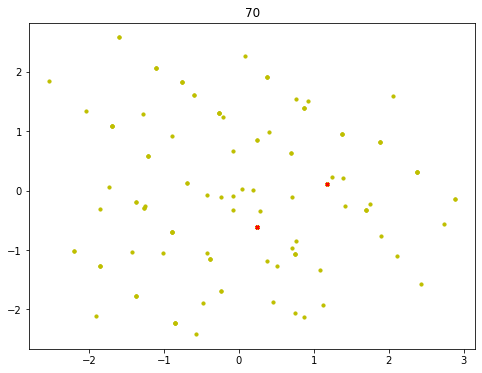

Distances same class: tensor([0., 0., 0.], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0
(6, 11)


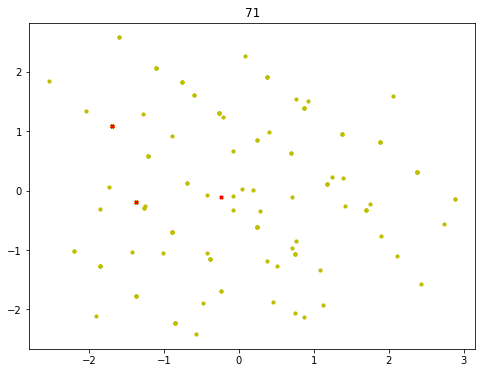

Distances same class: tensor([0.], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0
(6, 11)


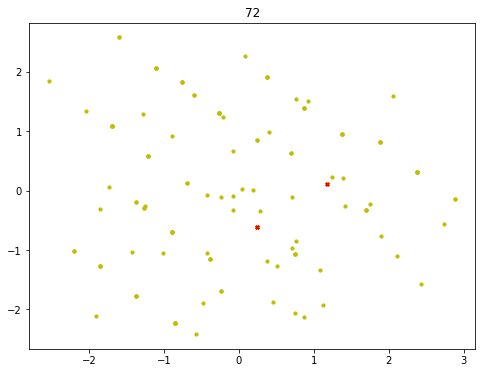

Distances same class: tensor([0., 0., 0.], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0
(6, 11)


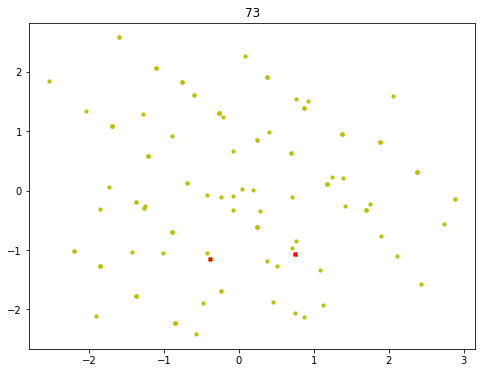

Distances same class: tensor([0., 0.], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0
(6, 11)


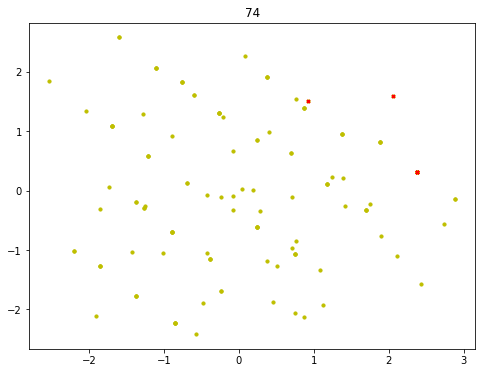

Distances same class: tensor([0.0108, 0.0142, 0.0142], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.03915409743785858
(6, 11)


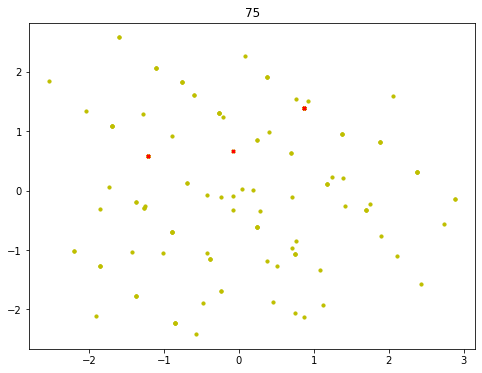

Distances same class: tensor([0.0051, 0.0051, 0.0051, 0.0071, 0.0071], device='cuda:0',
       grad_fn=<StackBackward>)
Same class distances sum: 0.029534559696912766
(6, 11)


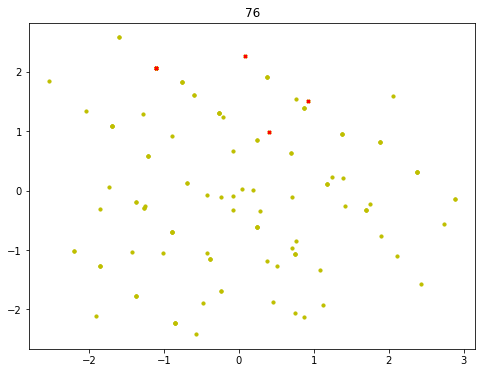

Distances same class: tensor([0.0069, 0.0201], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.027016444131731987
(6, 11)


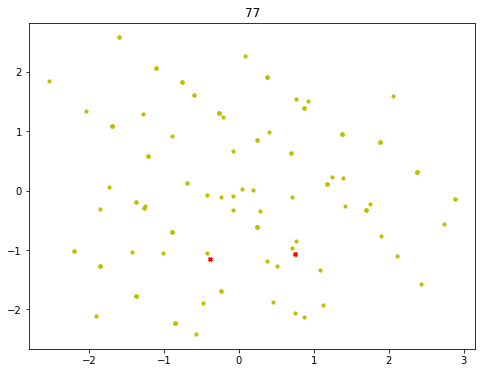

Distances same class: tensor([0., 0.], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0
(6, 11)


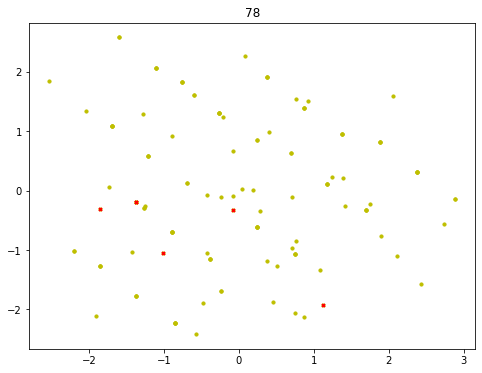

Distances same class: tensor([0.0070, 0.0090, 0.0068], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.022918321192264557
(6, 11)


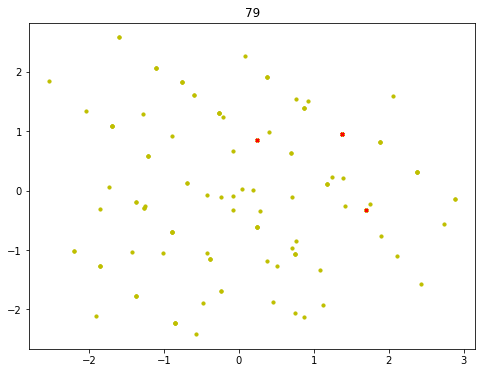

Distances same class: tensor([0., 0.], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0
(6, 11)


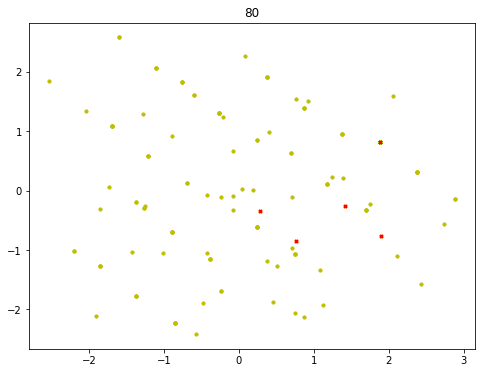

Distances same class: tensor([0.0171, 0.0064], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.023467648774385452
(6, 11)


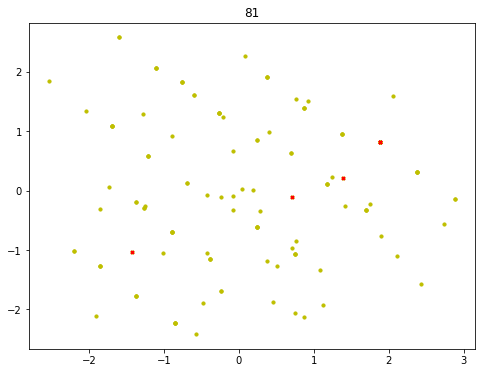

Distances same class: tensor([0.0173, 0.0163], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.03357447683811188
(6, 11)


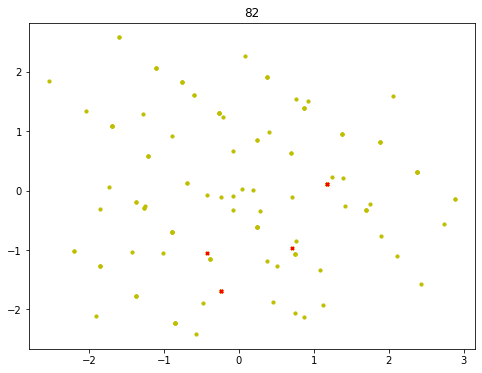

Distances same class: tensor([0.0062, 0.0084, 0.0084], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.022939525544643402
(6, 11)


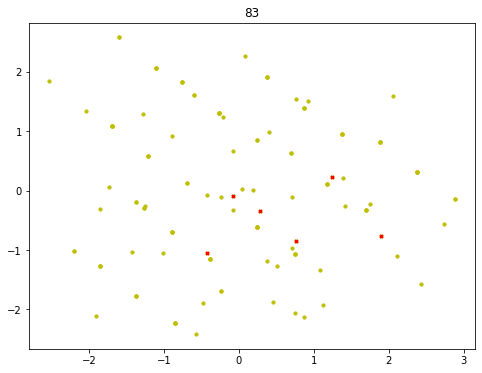

Distances same class: tensor([0.0104, 0.0099, 0.0056, 0.0126], device='cuda:0',
       grad_fn=<StackBackward>)
Same class distances sum: 0.038595445454120636
(6, 11)


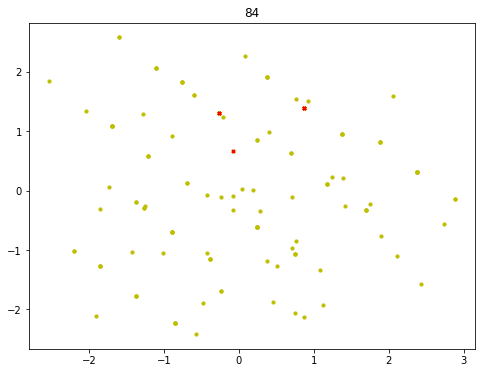

Distances same class: tensor([0.0000, 0.0000, 0.0014], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.001369123114272952
(6, 11)


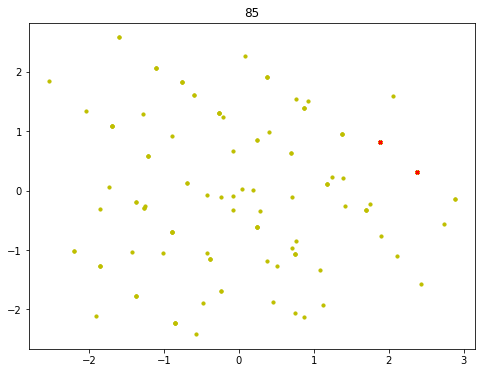

Distances same class: tensor([0.0000, 0.0152], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.015167920850217342
(6, 11)


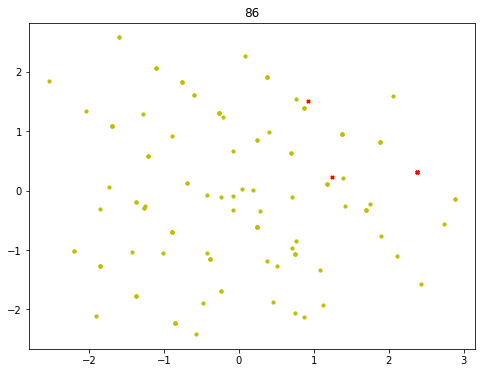

Distances same class: tensor([0.0047, 0.0047], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.00948758888989687
(6, 11)


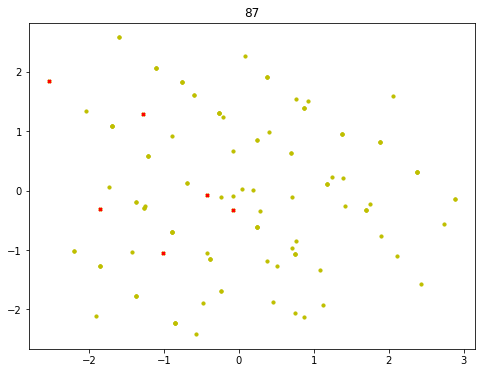

Distances same class: tensor([0.0046, 0.0058, 0.0121], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.02245822548866272
(6, 11)


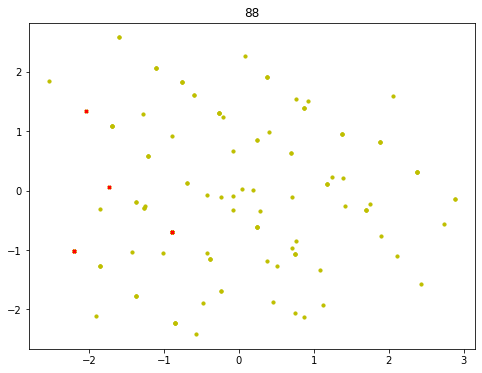

Distances same class: tensor([0.0041, 0.0117, 0.0117], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0274171344935894
(6, 11)


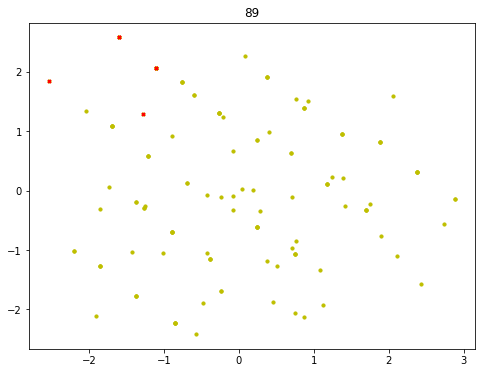

Distances same class: tensor([0.0055, 0.0128], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.018342405557632446
(6, 11)


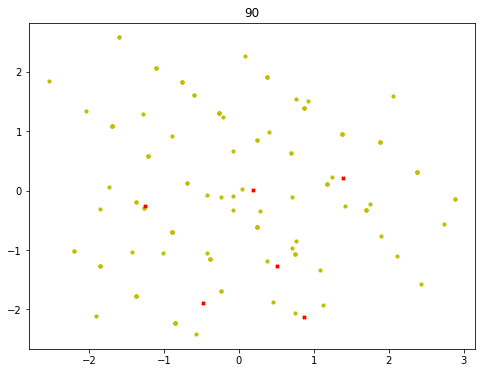

Distances same class: tensor([0.0036, 0.0060, 0.0099, 0.0399, 0.0078], device='cuda:0',
       grad_fn=<StackBackward>)
Same class distances sum: 0.06708912551403046
(6, 11)


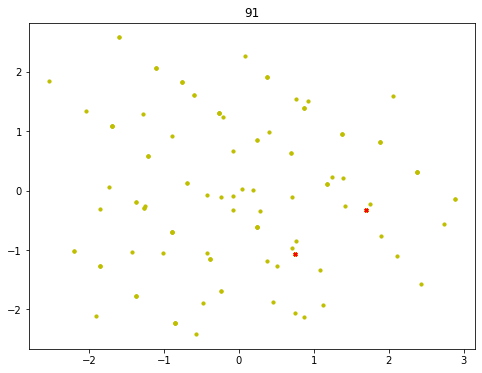

Distances same class: tensor([0., 0.], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0
(6, 11)


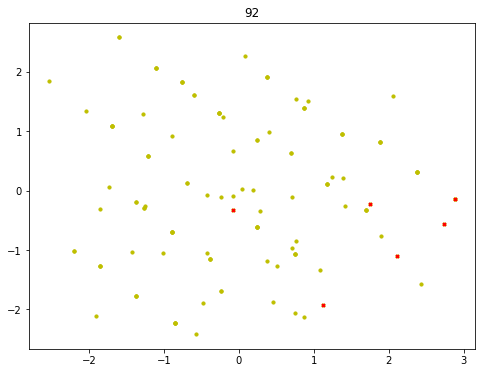

Distances same class: tensor([0.0103, 0.0132, 0.0194], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.04288744926452637
(6, 11)


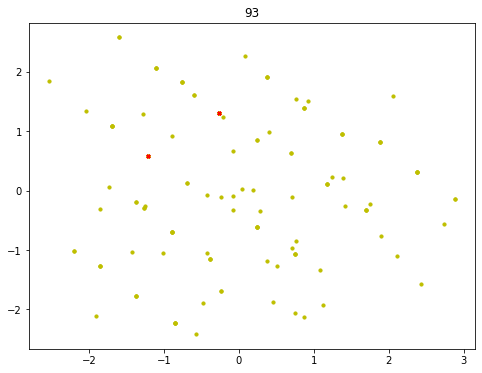

Distances same class: tensor([0., 0.], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0
(6, 11)


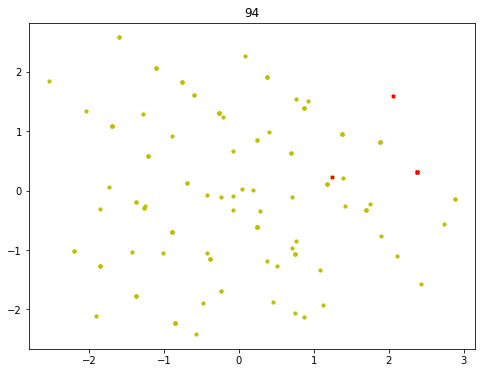

Distances same class: tensor([0.0000, 0.0020], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0020480258390307426
(6, 11)


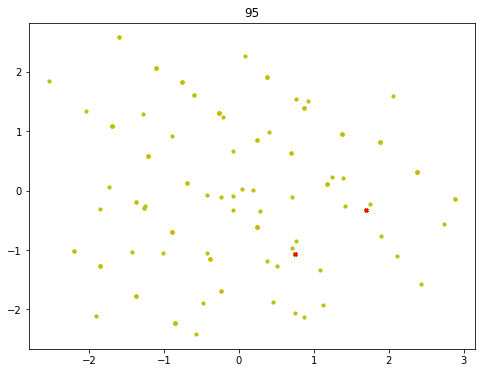

Distances same class: tensor([0., 0.], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0
(6, 11)


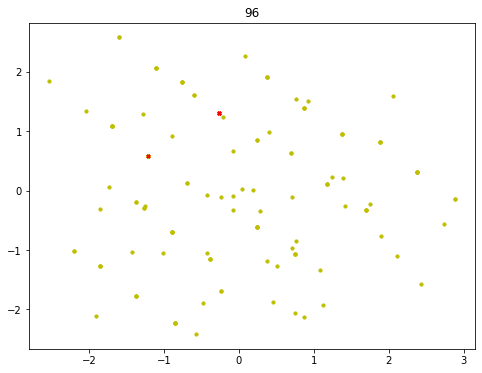

Distances same class: tensor([0., 0., 0.], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0
(6, 11)


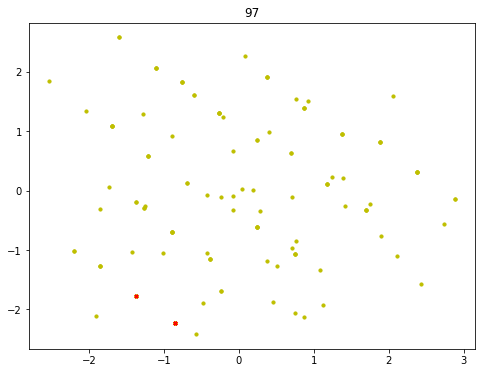

Distances same class: tensor([0.], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0
(6, 11)


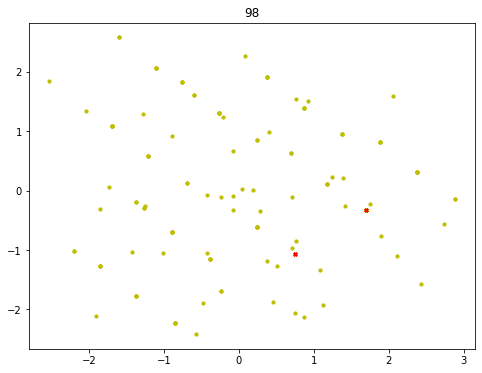

Distances same class: tensor([0., 0.], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0
(6, 11)


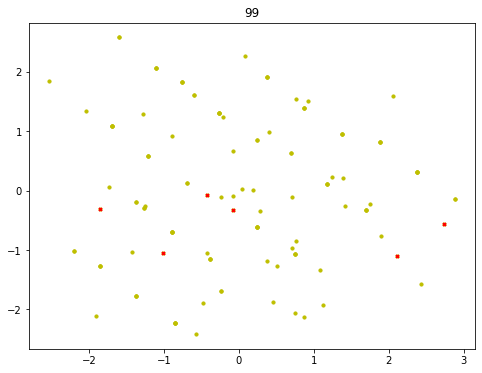

Distances same class: tensor([0.0016, 0.0032, 0.0045, 0.0110, 0.0068], device='cuda:0',
       grad_fn=<StackBackward>)
Same class distances sum: 0.027046266943216324
(6, 11)


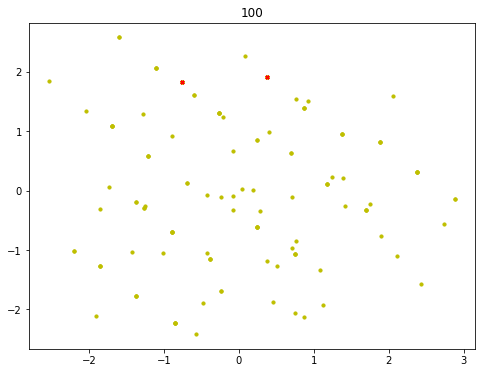

Distances same class: tensor([0., 0.], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0
(6, 11)


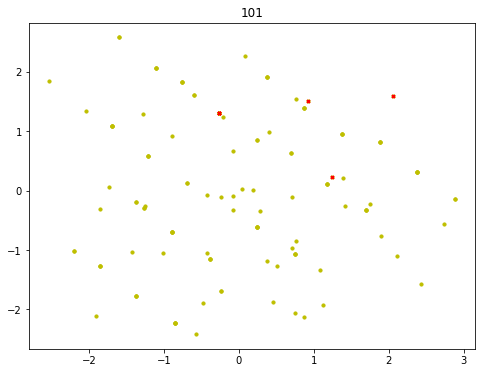

Distances same class: tensor([0.0030], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0029528269078582525
(6, 11)


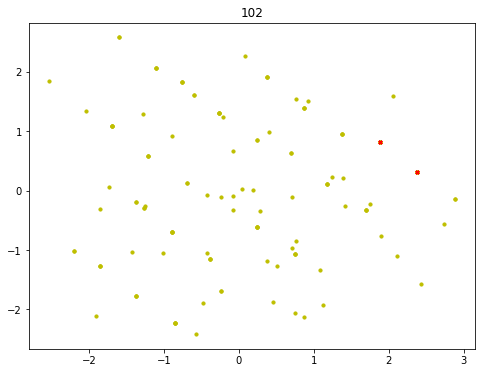

Distances same class: tensor([0.0065, 0.0065], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.012974496930837631
(6, 11)


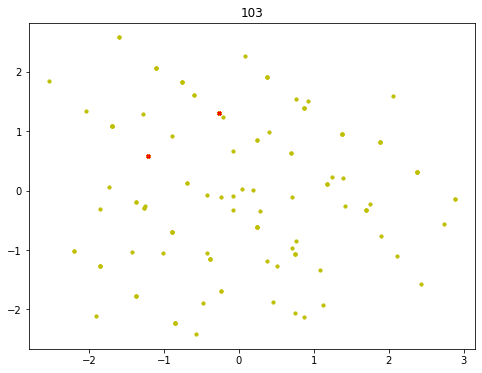

Distances same class: tensor([0., 0.], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0
(6, 11)


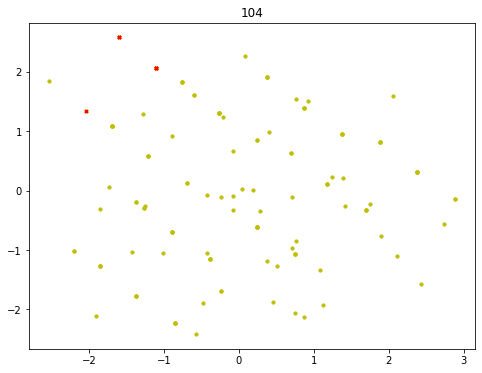

Distances same class: tensor([0.0000, 0.0080], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.008018052205443382
(6, 11)


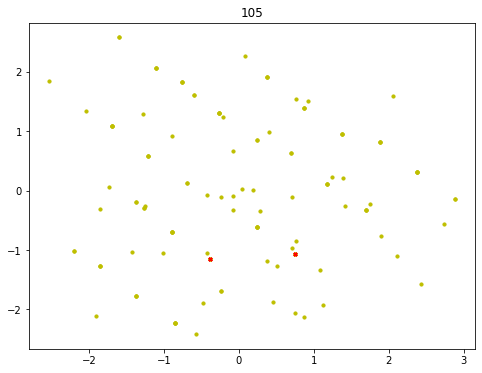

Distances same class: tensor([0., 0.], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0
(6, 11)


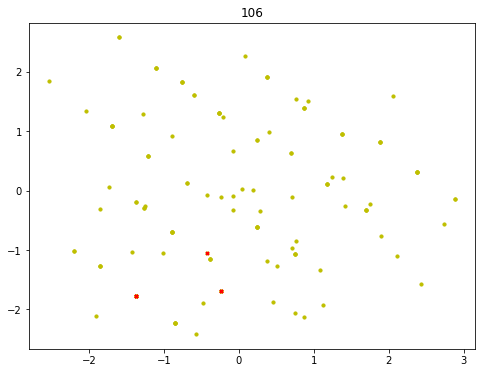

Distances same class: tensor([0.0073], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.007305200211703777
(6, 11)


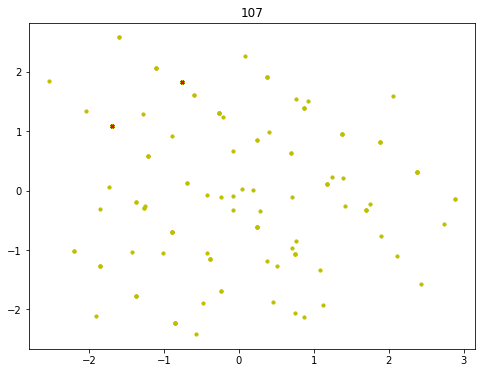

Distances same class: tensor([0., 0.], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0
(6, 11)


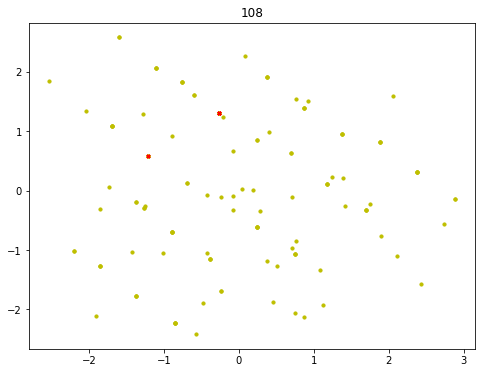

Distances same class: tensor([0., 0., 0.], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0
(6, 11)


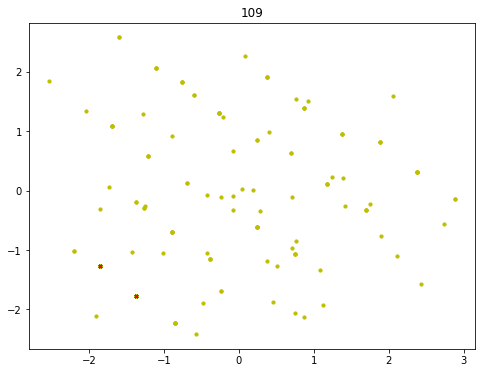

Distances same class: tensor([0.0000, 0.0030], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.002971934387460351
(6, 11)


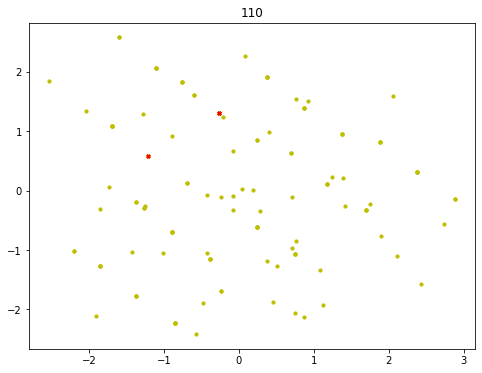

Distances same class: tensor([0., 0., 0.], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0
(6, 11)


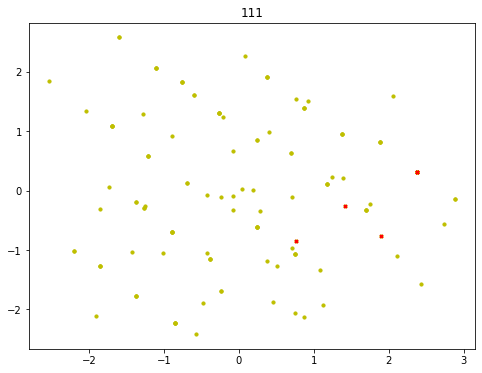

Distances same class: tensor([0.0049, 0.0078], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.012664992362260818
(6, 11)


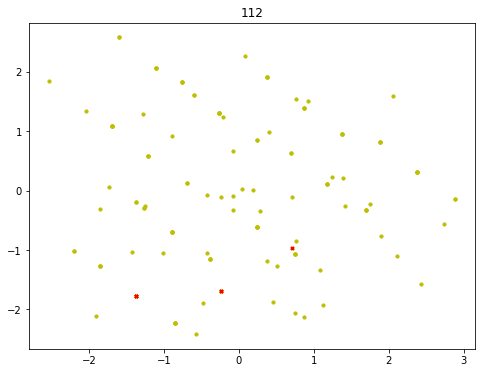

Distances same class: tensor([0.0000, 0.0025, 0.0025], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.004996657371520996
(6, 11)


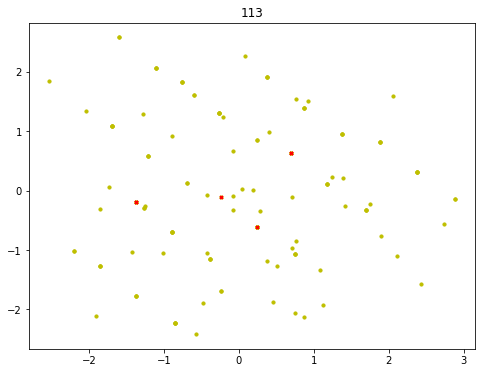

Distances same class: tensor([0.0095], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.00945722684264183
(6, 11)


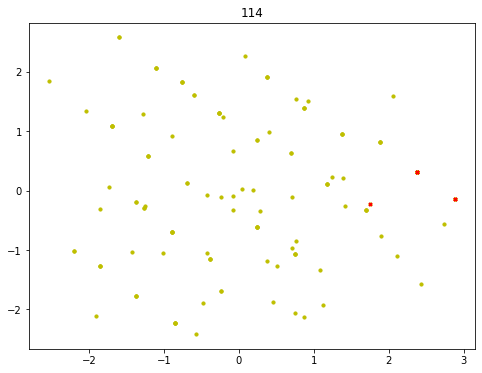

Distances same class: tensor([0.0072], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0071502551436424255
(6, 11)


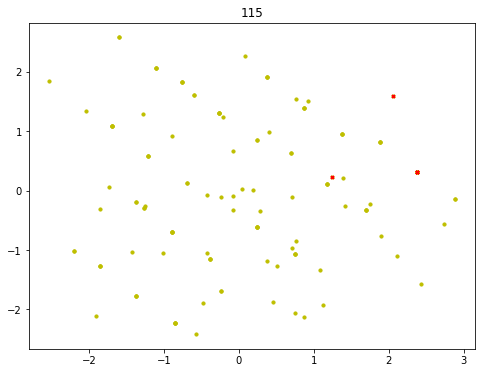

Distances same class: tensor([0.0000, 0.0067], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.006706711836159229
(6, 11)


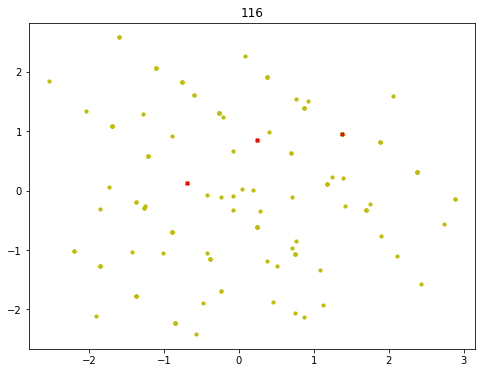

Distances same class: tensor([0.], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0
(6, 11)


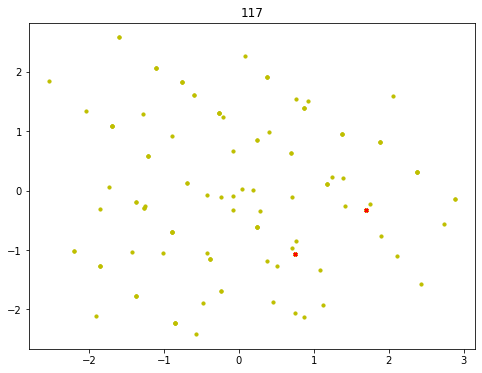

Distances same class: tensor([0., 0.], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0
(6, 11)


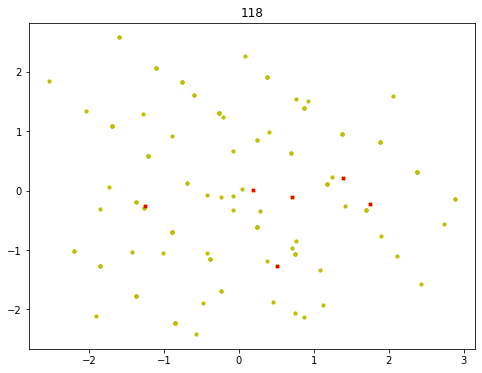

Distances same class: tensor([0.0030, 0.0035, 0.0103, 0.0043], device='cuda:0',
       grad_fn=<StackBackward>)
Same class distances sum: 0.02107696421444416
(6, 11)


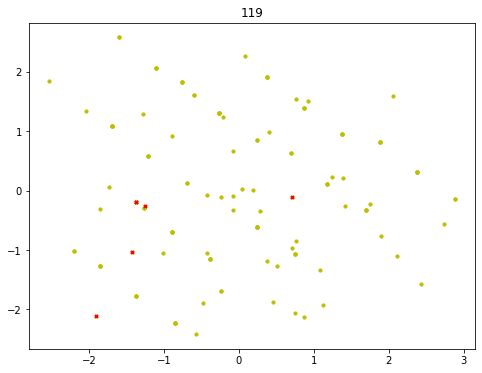

Distances same class: tensor([0.0052, 0.0104, 0.0055], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.02113150805234909
(6, 11)


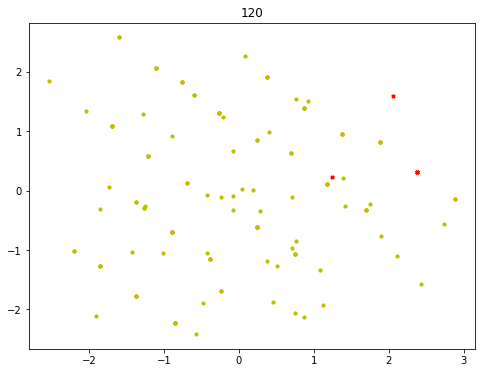

Distances same class: tensor([0.0000, 0.0034], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0033598863519728184
(6, 11)


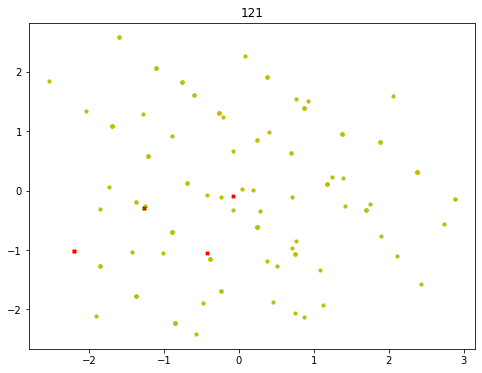

Distances same class: tensor([0.0000, 0.0087, 0.0051], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.013755397871136665
(6, 11)


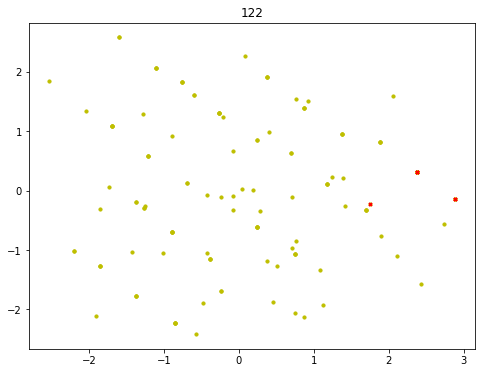

Distances same class: tensor([0.0034, 0.0044, 0.0044], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.012134313583374023
(6, 11)


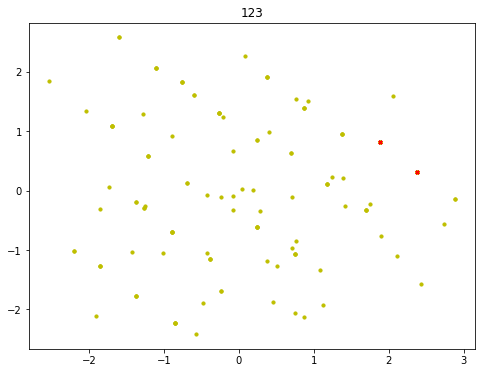

Distances same class: tensor([0.0000, 0.0019], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0018741234671324492
(6, 11)


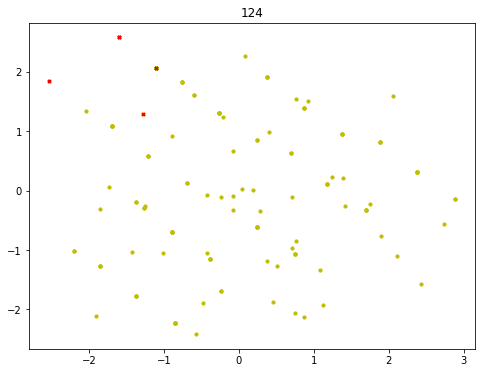

Distances same class: tensor([0.0072, 0.0027], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.00985511764883995
(6, 11)


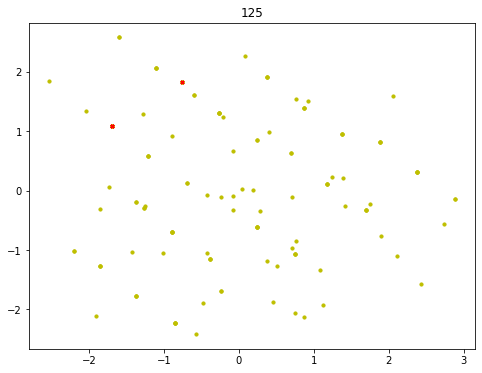

Distances same class: tensor([0., 0., 0.], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0
(6, 11)


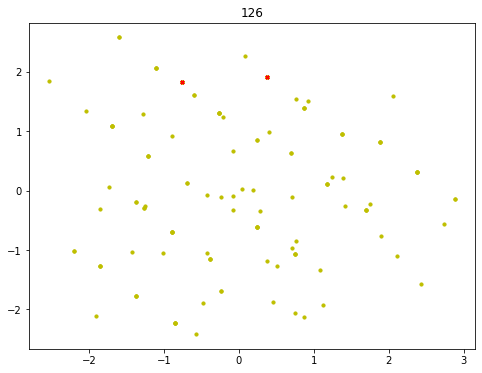

Distances same class: tensor([0., 0.], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0
(6, 11)


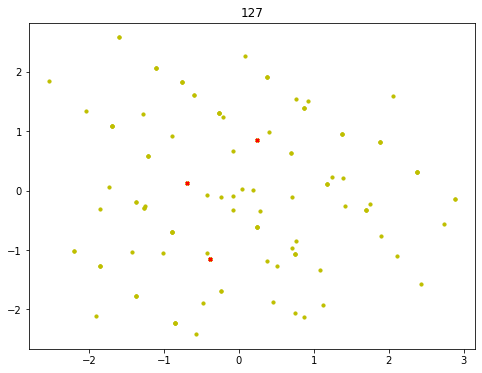

Distances same class: tensor([0.], device='cuda:0', grad_fn=<StackBackward>)
Same class distances sum: 0.0


RuntimeError: Boolean value of Tensor with more than one value is ambiguous

In [12]:
result_dict = defaultdict(list)

safety_dict = defaultdict(list)

if test_all_ds:
    ds_names = dt_name_to_cols_to_encode.keys()
else:
    ds_names = [ds_name]
for dataset_name in ds_names:
# for dataset_name in list(datasets.keys()):
    print(dataset_name)
    result_dict["dataset"].append(dataset_name)
    fold_result_dict = defaultdict(list)
    
    safety_dict["dataset"].append(dataset_name)
    fold_safety_dict = defaultdict(list)

    X, y = datasets[dataset_name]['data'], datasets[dataset_name]['target']
    X_encoded, y = datasets[f"{dataset_name}_encoded"]['data'], datasets[f"{dataset_name}_encoded"]['target']
    
    skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    n_splits = skf.get_n_splits(X, y)
    
    folds = []
    if test_on_all_folds:
        folds = skf.split(X, y)
    else:
        folds = list(skf.split(X, y))[1:2]
        
    for train_index, test_index in folds:
        X_train, X_test = X[train_index], X[test_index]
        X_train_norm, X_test_norm = standardize(X_train, X_test)
        y_train, y_test = y[train_index], y[test_index]
        
        
        X_train_enc, X_test_enc = X_encoded[train_index], X_encoded[test_index]
        X_train_enc, X_test_enc = standardize(X_train_enc, X_test_enc)
        
        
        # PCA X_train
        pca = PCA(n_components=2)
        pca.fit(X_train_enc)
        plot_embeddings(pca.transform(X_train_enc), y_train)
        plt.title("X_train")
        plt.show()
        
        weights = ex.weights_calculation_strategy1(X_train, y_train)
        cfg =  config[dataset_name]
        # pretrain ANN triplets
        embeddings_train, embeddings_test = ex.train_triplets(X_train_enc, y_train, X_test_enc, y_test, weights,cfg, pca)
        
        
        # PCA embeddings_train
        pca = PCA(n_components=2)
        plot_embeddings(pca.fit_transform(embeddings_train), y_train)
        plt.title("Embeddings_train")
        plt.show()

In [ ]:
# from torch.utils.data import TensorDataset, DataLoader, Dataset
# import torch


# dataset1 = TensorDataset(torch.Tensor(X_train_enc), torch.Tensor(y_train))
# dataset1.train_data = torch.Tensor(X_train_enc)
# dataset1.train_labels = torch.Tensor(y_train)
# dataset1.train = True

In [ ]:
# from sklearn.neighbors import NearestNeighbors

# class NeighborsDataset(Dataset):
#     def __init__(self, ds, n_neighbors=6):
#         np.random.seed(0)
#         self.ds = ds
#         self.train = self.ds.train
#         self.neigh = NearestNeighbors(n_neighbors=n_neighbors)

#         if self.train:
#             self.train_labels = self.ds.train_labels
#             self.train_data = self.ds.train_data
#             self.neigh.fit(self.ds.train_data)

#         else:
#             self.test_labels = self.ds.test_labels
#             self.test_data = self.ds.test_data
#             self.neigh.fit(self.ds.test_data)

#     def __getitem__(self, index):
#         if self.train:
#             anchor = self.train_data[index]
#             anchor_label = self.train_labels[index]
#             neigh_indices = self.neigh.kneighbors([anchor.numpy()], return_distance=False)
#             neigh_indices = [ind for ind in neigh_indices[0] if ind != index] # without self
#             neighbors = self.train_data[neigh_indices, :]
#             neighbors_labels = self.train_labels[neigh_indices]
#         else:
#             anchor = self.test_data[index]
#             anchor_label = self.test_labels[index]
#             neigh_indices = self.neigh.kneighbors([anchor.numpy()], return_distance=False)
#             neigh_indices = [ind for ind in neigh_indices[0] if ind != index] # without self
#             neighbors = self.test_data[neigh_indices]
#             neighbors_labels = self.test_data[neigh_indices]
#         return (anchor, *neighbors), [anchor_label, *neighbors_labels]

#     def __len__(self):
#         return len(self.ds)

In [ ]:
# neighbors_train_dataset = NeighborsDataset(dataset1)


In [ ]:
# neighbors_train_dataset[0]